<a href="https://colab.research.google.com/github/rbryan2001/CSCI_591/blob/main/assignments/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 -  & Computational Programming

**Rebecca Bryan**

Netid: 790759512

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus on Canvas for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

#  Learning Objectives
The purpose of this assignment is to provide a refresher on fundamental concepts that we will use throughout this course, and provide an opportunity to develop skills in any of the related skills that may be unfamiliar to you. Through the course of completing this assignment, you will...
- Practice numerical programming by loading and filtering data, plotting data, vectorizing operations, profiling code speed, and debugging and optimizing performance. You will also practice computing probabilities based on simulation.
- Develop or refresh your knowledge of Git version control, which will be a core tool used in the final project of this course
- Apply your skills altogether through an exploratory data analysis to practice data cleaning, data manipulation, interpretation, and communication

We will build on these concepts throughout the course, so use this assignment as a catalyst to deepen your knowledge and seek help with anything that is unfamiliar.


*Note: for all assignments, write out all equations and math using markdown and [LaTeX](https://tobi.oetiker.ch/lshort/lshort.pdf). For this assignment show ALL math work*

**ANSWER**

# Numerical Programming

## 1
**[30 points]** Loading data and gathering insights from a real dataset

In data science, we often need to have a sense of the idiosyncrasies of the data, how they relate to the questions we are trying to answer, and to use that information to help us to determine what approach we may need to apply to achieve our goal. This exercise provides practice in exploring a dataset and answering question that might arise from applications related to the data.


**Data**. The data for this problem can be found in the `data` subfolder in the `assignments` folder on [github](https://github.com/lucywowen/csci591_CCN). The filename is `stroke.csv`.

A stroke occurs when the blood flow to a part of the brain is reduced or restricted. Due to this brain cells start to die, in that part of the brain, at a very fast rate due to a lack of oxygen and nutrients. There are two types of brain strokes: (a) Ischemic stroke and (b) Haemorrhagic stroke of which ischemic stroke is more likely to occur. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues.
 Here we have used 8 input parameters like gender, age, various diseases, and smoking status in this dataset on brain stroke detection from Kaggle.
 The following information is provided about the patient:

    
|field    |description|
|:-----   |:-----|
|id       |unique identifier|
|gender   |'Male', 'Female', or 'Other'|
|age   |age of patient|
|hypertension    |0 if patient doesn't have hypertension; 1 if patient has hypertension|
|heart_disease      |0 if patient doesn't have heart disease; 1 if patient has heart disease|
|ever_married     |'No', 'Yes'|
|work_type |'children', 'Govt_jov', 'Never_worked', 'Private', 'Self-employed' |
|Residence_type   |'Rural', 'Urban' |
|avg_glucose_level |average glucose level of the patient|
|bmi |body mass index of the patient|
|smoking_status |'formerly smoked', 'never smoked', 'smokes', 'Unknown'|
|stroke |0 if patient has not had a stroke; 1 if patient has had a stroke|


**Your objective**. For this dataset, your goal is answer the following questions about these patients:

**(a)** Calculate the bmi mean and standard deviation for patients who have had a stroke. Calculate the bmi mean and standard deviation for patients who have had NOT had stroke.

**(b)** Assess the NA values in the data. Count the rows that have stroke as 0 and 1 respectively when bmi is null.

**(c)** Recalculate the bmi mean and standard deviation for patients who have had and have not had a stroke.  Plot this data as a box plot.

**(d)** Plot the same boxplot as above, but with the raw data plotted.  What additional information does this raw data provide? Briefly explain the differences between the plots shown in c and d.

**(e)** Plot a histogram of age distributions of the patients that have had strokes and patients that have not had strokes.  

**(f)** Plot a density plot of age distributions of the patients that have had strokes and patients that have not had strokes.  How is this plot different from the histogram plotted in e?  

**(g)** Plot a density plot of age distributions of the patients that have had strokes and patients that have not had strokes, by gender.  

**(h)** Plot a density plot of age distributions of the patients that have had strokes and patients that have not had strokes, by gender 'Male' and 'Female'. What changes with this plot relative to what you plotted for g?  

**ANSWER**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/lucywowen/csci591_CCN/refs/heads/main/assignments/data/stroke.csv

--2025-01-30 21:34:46--  https://raw.githubusercontent.com/lucywowen/csci591_CCN/refs/heads/main/assignments/data/stroke.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316971 (310K) [text/plain]
Saving to: ‘stroke.csv’

stroke.csv          100%[===================>] 309.54K  --.-KB/s    in 0.04s   

2025-01-30 21:34:47 (8.53 MB/s) - ‘stroke.csv’ saved [316971/316971]



In [ ]:
stroke = pd.read_csv('stroke.csv')
stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
stroke.shape

(5110, 12)

#### **(a)** Calculate the bmi mean and standard deviation for patients who have had a stroke. Calculate the bmi mean and standard deviation for patients who have had NOT had stroke.

In [ ]:
stroke.groupby('stroke').bmi.agg(['mean','std'])

mean       std
stroke                     
0       28.823064  7.908287
1       30.471292  6.329452

Patients who have not had a stroke have a mean BMI of 28.82 with a standard deviation of 7.91. Patients who have had a stroke had a mean BMI of 30.47 with a standard deviation of 6.33.

#### (b) Assess the NA values in the data. Count the rows that have stroke as 0 and 1 respectively when bmi is null.

In [ ]:
stroke.bmi.isna().sum()

201

In [ ]:
nans = stroke[stroke.bmi.isna() == True]
nans.shape

(201, 12)

In [ ]:
nans.stroke.value_counts()

stroke
0    161
1     40
Name: count, dtype: int64

Of the rows missing a BMI score, 161 had not had a stroke, and 40 had had a stroke.

#### **(c)** Recalculate the bmi mean and standard deviation for patients who have had and have not had a stroke. Plot this data as a box plot.

In [ ]:
stroke1 = stroke.dropna(axis=0, how='any',subset=['bmi'])
grouped = stroke1.bmi.groupby(level = 'stroke')
grouped.boxplot(rot=45, fontsize=12, figsize=(8, 10))

ValueError: level name stroke is not the name of the index

# Version Control via Git

## 2
**[10 points]** Git is efficient for collaboration, and expectation in industry, and one of the best ways to share results in academia. You can even use some Git repositories (e.g. Github) as hosts for website, such as with the [course website](https://kylebradbury.github.io/ids705/index.html). As a data scientist with experience in machine learning, Git is expected. We will interact with Git repositories (a.k.a. repos) throughout this course, and your project will require the use of git repos for collaboration.

Complete the [Atlassian Git tutorial](https://www.atlassian.com/git/tutorials/what-is-version-control), specifically the following listed sections. Try each concept that's presented. For this tutorial, instead of using BitBucket as your remote repository host, you may use your preferred platform such as [Github](https://github.com/) or [Duke's Gitlab](https://gitlab.oit.duke.edu/users/sign_in).
1. [What is version control](https://www.atlassian.com/git/tutorials/what-is-version-control)
2. [What is Git](https://www.atlassian.com/git/tutorials/what-is-git)
3. [Install Git](https://www.atlassian.com/git/tutorials/install-git)
4. [Setting up a repository](https://www.atlassian.com/git/tutorials/install-git)
5. [Saving changes](https://www.atlassian.com/git/tutorials/saving-changes)
6. [Inspecting a repository](https://www.atlassian.com/git/tutorials/inspecting-a-repository)
7. [Undoing changes](https://www.atlassian.com/git/tutorials/undoing-changes)
8. [Rewriting history](https://www.atlassian.com/git/tutorials/rewriting-history)
9. [Syncing](https://www.atlassian.com/git/tutorials/syncing)
10. [Making a pull request](https://www.atlassian.com/git/tutorials/making-a-pull-request)
11. [Using branches](https://www.atlassian.com/git/tutorials/using-branches)
12. [Comparing workflows](https://www.atlassian.com/git/tutorials/comparing-workflows)

I also have created two videos on the topic to help you understand some of these concepts: [Git basics](https://www.youtube.com/watch?v=fBCwfoBr2ng) and a [step-by-step tutorial](https://www.youtube.com/watch?v=nH7qJHx-h5s).

For your answer, affirm that you *either* completed the tutorials above OR have previous experience with ALL of the concepts above. Confirm this by typing your name below and selecting the situation that applies from the two options in brackets.

**ANSWER**

*I, [**Rebecca Bryan**], affirm that I have [**completed the above tutorial / I have previous experience that covers all the content in this tutorial**]*

# Exploratory Data Analysis
## 3
**[50 points]** Here you'll bring together some of the individual skills that you demonstrated above and perform exploratory data analysis. Your goal is to explore the [datasets available](https://github.com/lucywowen/csci591_CCN/tree/main/projects) and identify questions or problems you're interested in working with.  Below, we walk through a process to follow for your analysis.

1. Find 3 datasets that interest you.  I provide you with several opensource here [here](https://github.com/lucywowen/csci591_CCN/tree/main/projects), but feel free to look for others!  
2. For each of the 3 datasets, describe the dataset, the source of the data, and the reason the dataset was of interest. What question are you hoping to answer through exploring the dataset?
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized. If the data are clean, state how you know they are clean (what did you check?).
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots. You should have at least a ~3 plots exploring the data in different ways ... so at least 9 plots total.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this for a general audience - boil down your findings in a way that is accessible, but still accurate.
5. Define a clear question for each dataset that you would be interested in working on for the remainder of the semester.  Be prepared to pitch your project proposals to the class!


### Dataset 1: Miller ECoG data of the memory nback task

This dataset contains ECoG readings from participants in 0-back, 1-back, and 2-back memory experiments in which th participants must respond to images of houses with varying other image options. Each subjects data are broken into 5 time blocks, fixation, exp1, exp2, exp3, fixation. I am unsure what "fixation" means, but exp1 is the 0-back experiment, exp2 the 1-back experiment, and exp3 is the 2-back experiment. If I were to use this dataset, I would need to do further research on 0,1,and 2-back experiments.

This dataset is from multiple ECoG datasets from Miller that were recorded in clinical settings. Memory in general is interesting to me, so exploring neural activity in regards to memory sounds fun. Ultimately, the Miller datasets also seemed to be the most accessible for me, as someone without a background in neuroscience.

A couple of possible questions this dataset might be able to answer are:

1.) Does neural activity change over the course of the experiment, indicating fatigue or adaptation to the task?

2.) Are there spatial patterns of neural activity that differentiate response trials from non-response trials?

The Data retrieval, install packages, data loading, and first plot of the electrodes on the brain are all directly copy and pasted from the provided notebook [here](https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/main/projects/ECoG/load_ECoG_memory_nback.ipynb#scrollTo=e-UxBzOILnq3).

In [3]:
# @title Data retrieval
import os, requests

fname = 'memory_nback.npz'
url = "https://osf.io/xfc7e/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [1]:
# @title Install packages (`nilearn`, `nimare`, `duecredit`), import `matplotlib` and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet
!pip install duecredit --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.9/179.9 kB 7.1 MB/s eta 0:00:00


In [4]:
# @title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat = alldat[1][1]

print(dat.keys())

dict_keys(['V', 't_off', 'locs', 'srate', 'scale_uv', 't_on', 'target', 'stim_id', 'response', 'rt', 'expinfo', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


For the sake of time and the fact that this dataset isn't already loaded as a pandas dataframe, I am only going to explore the data for subject 1 block 1, as defined in the previous code. If I were to work with this dataset, I would create separate dataframes for each subject and block.


In [23]:
# Convert the data for subject 1 block 1 to a pandas dataframe for easier viewing/exploration

import pandas as pd
# Extract the necessary data into a structured format for pandas DataFrame
block_data = {
    "Voltage": [],
    "Timepoints": [],
    "Electrode": [],
    "t_on": [],
    "t_off": [],
    "stim_id": [],
    "target": [],
    "response": [],
    "rt": [],
    "expinfo": [],
    "hemisphere": [],
    "lobe": [],
    "gyrus": [],
    "Brodmann_Area": [],
    "Electrode_X": [],
    "Electrode_Y": [],
    "Electrode_Z": [],
}

# Extract relevant data from the provided structure
voltage_data = np.array([
    [0.002039, 0.001429, 0.0006576, 0.00646, 0.00617, 0.0001928],
    [0.001413, 0.0002565, 0.0007706, 0.004936, 0.004646, -0.003567],
    [-0.0006757, -0.002293, -0.0009737, 0.001943, 0.001643, -0.0096],
])  # Example subset

electrode_locs = np.array([
    [20.49, -45.51, 65.36],
    [29.68, -35.88, 66.03],
    [32.02, -25.41, 65.47],
])  # Example subset

t_on = np.array([6721, 8921, 11121])
t_off = np.array([7321, 9521, 11721])
stim_id = np.array([23, 30, 7])
target = np.array([0, 0, 0])
response = np.array([0, 0, 0])
rt = np.array([np.nan, np.nan, np.nan])

# Populate the dictionary
for i, (voltages, loc) in enumerate(zip(voltage_data, electrode_locs)):
    for t, v in enumerate(voltages):
        block_data["Voltage"].append(v)
        block_data["Timepoints"].append(t)
        block_data["Electrode"].append(i + 1)
        block_data["Electrode_X"].append(loc[0])
        block_data["Electrode_Y"].append(loc[1])
        block_data["Electrode_Z"].append(loc[2])
        block_data["t_on"].append(t_on[i])
        block_data["t_off"].append(t_off[i])
        block_data["stim_id"].append(stim_id[i])
        block_data["target"].append(target[i])
        block_data["response"].append(response[i])
        block_data["rt"].append(rt[i])
        block_data["expinfo"].append("0-back")
        block_data["hemisphere"].append("Right Cerebrum")
        block_data["lobe"].append("Parietal Lobe")
        block_data["gyrus"].append("Postcentral Gyrus")
        block_data["Brodmann_Area"].append("Brodmann area 7")

# Create DataFrame
sub1block1 = pd.DataFrame(block_data)

# Display DataFrame
sub1block1

Voltage  Timepoints  Electrode   t_on  t_off  stim_id  target  response  \
0   0.002039           0          1   6721   7321       23       0         0   
1   0.001429           1          1   6721   7321       23       0         0   
2   0.000658           2          1   6721   7321       23       0         0   
3   0.006460           3          1   6721   7321       23       0         0   
4   0.006170           4          1   6721   7321       23       0         0   
5   0.000193           5          1   6721   7321       23       0         0   
6   0.001413           0          2   8921   9521       30       0         0   
7   0.000257           1          2   8921   9521       30       0         0   
8   0.000771           2          2   8921   9521       30       0         0   
9   0.004936           3          2   8921   9521       30       0         0   
10  0.004646           4          2   8921   9521       30       0         0   
11 -0.003567           5          2   8921   9521       30       0         0   
12 -0.000676           0          3  11121  11721        7       0         0   
13 -0.002293           1          3  11121  11721        7       0         0   
14 -0.000974           2          3  11121  11721        7       0         0   
15  0.001943           3          3  11121  11721        7       0         0   
16  0.001643           4          3  11121  11721        7       0         0   
17 -0.009600           5          3  11121  11721        7       0         0   

    rt expinfo      hemisphere           lobe              gyrus  \
0  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
1  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
2  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
3  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
4  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
5  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
6  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
7  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
8  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
9  NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
10 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
11 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
12 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
13 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
14 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
15 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
16 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   
17 NaN  0-back  Right Cerebrum  Parietal Lobe  Postcentral Gyrus   

      Brodmann_Area  Electrode_X  Electrode_Y  Electrode_Z  
0   Brodmann area 7        20.49       -45.51        65.36  
1   Brodmann area 7        20.49       -45.51        65.36  
2   Brodmann area 7        20.49       -45.51        65.36  
3   Brodmann area 7        20.49       -45.51        65.36  
4   Brodmann area 7        20.49       -45.51        65.36  
5   Brodmann area 7        20.49       -45.51        65.36  
6   Brodmann area 7        29.68       -35.88        66.03  
7   Brodmann area 7        29.68       -35.88        66.03  
8   Brodmann area 7        29.68       -35.88        66.03  
9   Brodmann area 7        29.68       -35.88        66.03  
10  Brodmann area 7        29.68       -35.88        66.03  
11  Brodmann area 7        29.68       -35.88        66.03  
12  Brodmann area 7        32.02       -25.41        65.47  
13  Brodmann area 7        32.02       -25.41        65.47  
14  Brodmann area 7        32.02       -25.41        65.47  
15  Brodmann area 7        32.02       -25.41        65.47  
16  Brodmann area 7        32.02       -25.41        65.47  
17  Brodmann area 7        32.02       -25.41        65.47

In [16]:
sub1block1.describe()

Voltage  Timepoints  Electrode          t_on         t_off  \
count  18.000000   18.000000  18.000000     18.000000     18.000000   
mean    0.000858    2.500000   2.000000   8921.000000   9521.000000   
std     0.003756    1.757338   0.840168   1848.369711   1848.369711   
min    -0.009600    0.000000   1.000000   6721.000000   7321.000000   
25%    -0.000459    1.000000   1.000000   6721.000000   7321.000000   
50%     0.001092    2.500000   2.000000   8921.000000   9521.000000   
75%     0.002015    4.000000   3.000000  11121.000000  11721.000000   
max     0.006460    5.000000   3.000000  11121.000000  11721.000000   

         stim_id  target  response   rt  Electrode_X  Electrode_Y  Electrode_Z  
count  18.000000    18.0      18.0  0.0    18.000000    18.000000    18.000000  
mean   20.000000     0.0       0.0  NaN    27.396667   -35.600000    65.620000  
std     9.905435     0.0       0.0  NaN     5.120577     8.446146     0.301876  
min     7.000000     0.0       0.0  NaN    20.490000   -45.510000    65.360000  
25%     7.000000     0.0       0.0  NaN    20.490000   -45.510000    65.360000  
50%    23.000000     0.0       0.0  NaN    29.680000   -35.880000    65.470000  
75%    30.000000     0.0       0.0  NaN    32.020000   -25.410000    66.030000  
max    30.000000     0.0       0.0  NaN    32.020000   -25.410000    66.030000

In [15]:
sub1block1.isna().sum()

Voltage           0
Timepoints        0
Electrode         0
t_on              0
t_off             0
stim_id           0
target            0
response          0
rt               18
expinfo           0
hemisphere        0
lobe              0
gyrus             0
Brodmann_Area     0
Electrode_X       0
Electrode_Y       0
Electrode_Z       0
dtype: int64

It looks like for subject 1 block 1, the reaction time for trials with a response in voltage data samples (1000Hz) was not recorded. I don't want to delete the entire column at this point, as I can explore the data without doing so, but that is one note of cleaning. Admittedly, I'm not sure what the best method is for looking for erroneous errors, but just using the .describe() method, there doesn't seem to be any glaringly obvious errors.

Admittedly, I'm having a hard time thinking about what to plot to explore this data. I'm not sure what I can compare that makes sense.

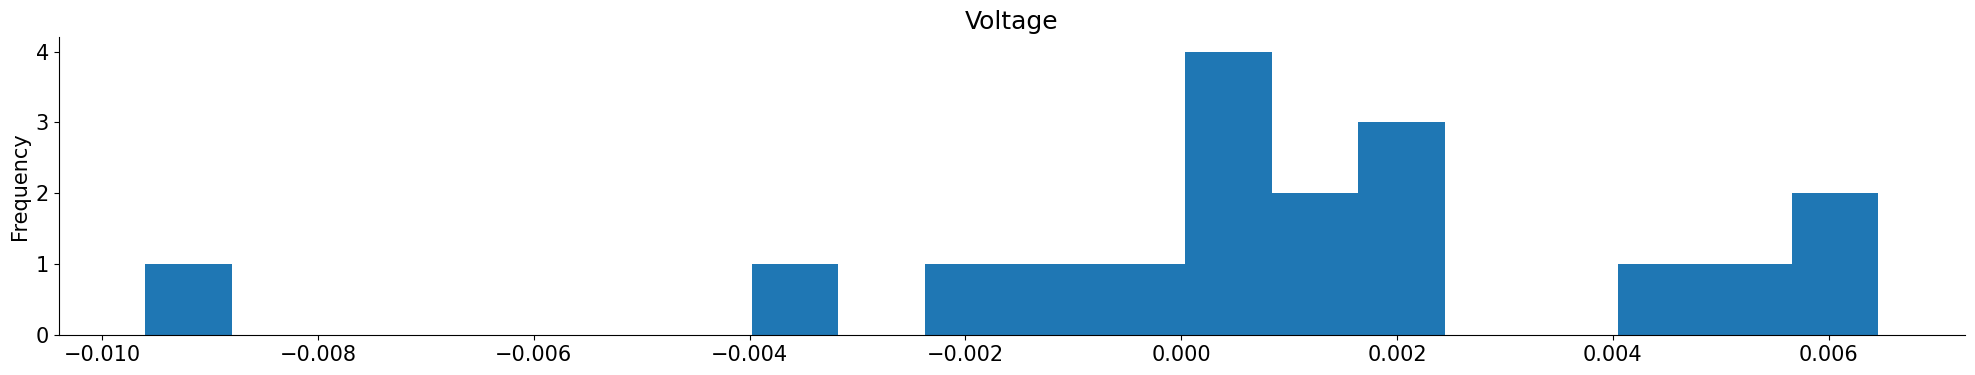

In [21]:
# @title Voltage

from matplotlib import pyplot as plt
sub1block1['Voltage'].plot(kind='hist', bins=20, title='Voltage')
plt.gca().spines[['top', 'right',]].set_visible(False)

The voltage histrogram reveals that the majority of voltage readings is between 0.00 and 0.003Hz

In [24]:
from nilearn import plotting
from nimare import utils

plt.figure(figsize=(8, 8))
locs = dat['locs']
view = plotting.view_markers(utils.tal2mni(locs),
                             marker_labels=['%d'%k for k in np.arange(locs.shape[0])],
                             marker_color='purple',
                             marker_size=5)
view

<Figure size 800x800 with 0 Axes>

I don't love that this dataset seems to only focus on one side of the brain, it feels limiting. I just don't know how to extrapolate much from it.

In [25]:
# compute spectral power above 50Hz and low-pass below 10Hz
# power is always positive, so we normalize it by its average
from scipy import signal

# pick subject 1 and experiment 1
dat = alldat[1][1]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

In [26]:
# divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['response'] == 0]).mean(0)

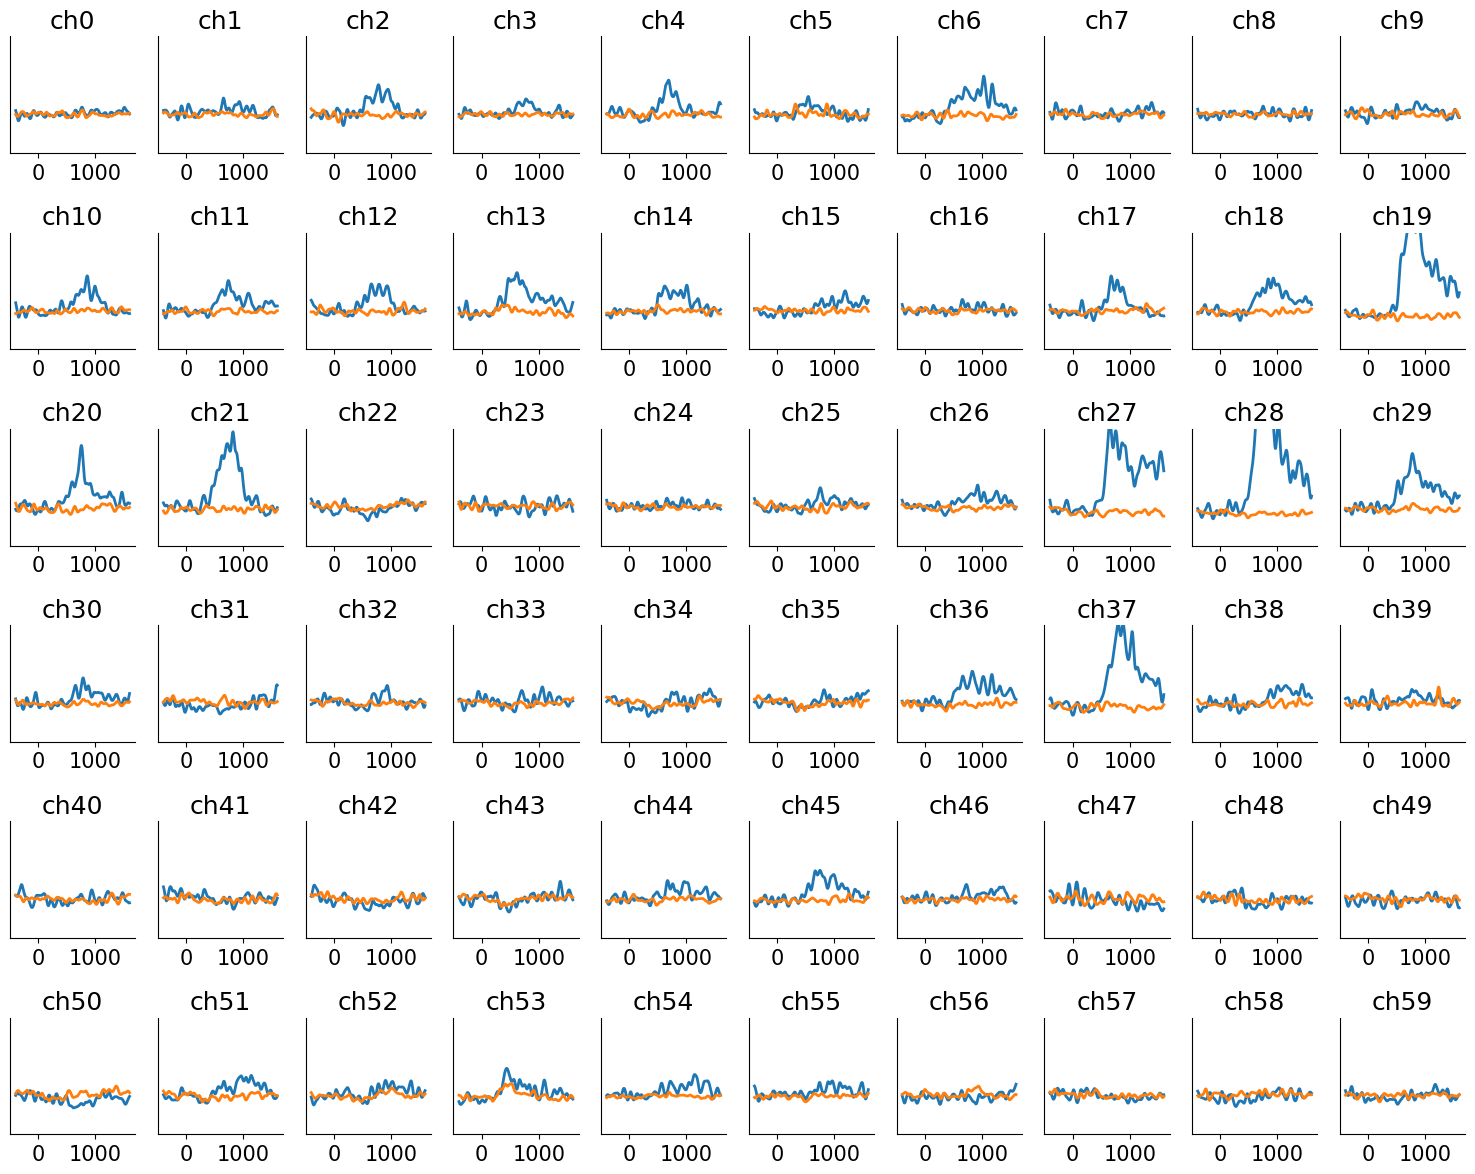

In [27]:
# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

The problem with this visualization is I'm not sure what "ch" means. Is it talking about the voltage of a specific electrode? That's what I would assume, but there's 63 electrodes in the previous visualization and only 59 here. I do see quite a few where the response is quite higher than the base voltage, so it would be worth looking into those specific electrodes.

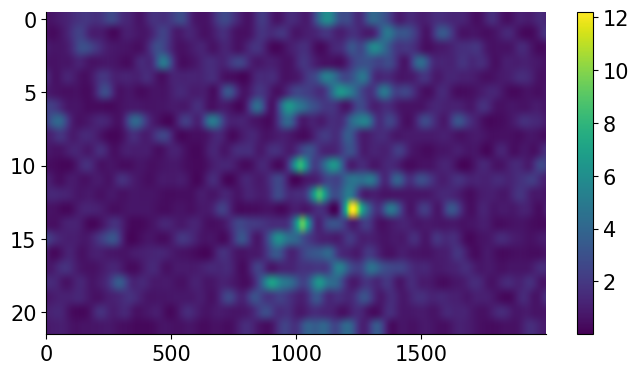

In [28]:
# let's look at all the response trials for the electrode that has a significant response
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[dat['response']==1, :, 21].astype('float32'),
           aspect='auto')
plt.colorbar()
plt.show()

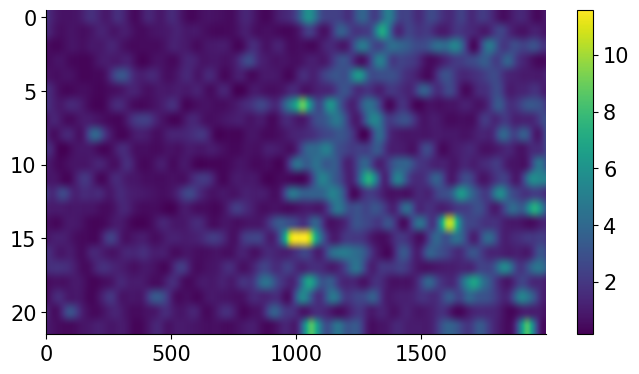

In [29]:
# this electrode has a more transient response
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[dat['response']==1, :, 27].astype('float32'),
           aspect='auto')
plt.colorbar()
plt.show()

I included plots from the given notebook because I'm struggling with this. I feel pretty overwhelmed right now, because I don't fully understand what I'm looking at and what means what for this dataset. I'd need to really do a deep dive, but I don't want to do that for a dataset I'm not going to be using for the semester because of my own time constraints. I don't think this dataset is as accessible for me as I thought it would be, and ultimately I'd rather look at other datasets for my project.

### Dataset 2 Miller ECoG data of the finger flexing task

In this experiement, subjects were cued with a word displayed on a bedside monitor indicating which finger to move during 2- second movement trials. The subject performed self-paced movements in response to each of these cues, and they typically moved each finger 2–5 times during each trial, but some trials included many more movements.

The motion of the fingers was captured with a dataglove, which was sampled at the same rate (1000Hz) as the voltage data. From the dataset readme:

Finger flexions, measured from the hand contralateral to grid placement. They are in 40ms blocks, and have non-zero offset. The 5 columns correspond to the digits thumb-index-middle-ring-little in order. Finger positions were recorded using a 5 degree-of-freedom dataglove sensor.

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across the entire recording and conversion to float16 to minimize size (please convert back to float32 for analysis).

This experiment is interesting for similar reason as the previous one - it's interesting to see how the brain responds to stimuli. It's another dataset that seemed fairly accessible.

A couple questions I could ask about this dataset include:

1.) Do some fingers exhibit stronger motor-related brain activity than others?

2.) Can we decode which finger is being moved based on ECoG activity?

The Data retrieval, data loading, and first plot of the electrodes on the brain are all directly copy and pasted from the provided notebook [here](https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/main/projects/ECoG/load_ECoG_fingerflex.ipynb#scrollTo=26c0X7MPL54b).

In [30]:
# @title Data retrieval
import os, requests

fname = 'fingerflex.npz'
url = "https://osf.io/5m47z/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [31]:
# @title Data loading

alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat = alldat[0][0]

print(dat.keys())

dict_keys(['V', 'dg', 't_on', 't_off', 'stim_id', 'stimtext', 'srate', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


Based on the notebook the data is from, it should be safe to assume the data is already cleaned. I will admit, I am feeling overwhelmed and need to get this done, so I am cutting corners a bit.

The visualizations are also from the notebook, as I think they are really interesting and informative, and I don't have the bandwidth to come up with my own right now given how complicated the data is.

In [32]:
from nilearn import plotting
from nimare import utils

plt.figure(figsize=(8, 8))
locs = dat['locs']
view = plotting.view_markers(utils.tal2mni(locs),
                             marker_labels=['%d'%k for k in np.arange(locs.shape[0])],
                             marker_color='purple',
                             marker_size=5)
view

<Figure size 800x800 with 0 Axes>

I really like that this dataset has more electrodes compared to the last dataset. This one focuses on both hemispheres of the brain, which I feel would provide more richness and opportunities for exploration.

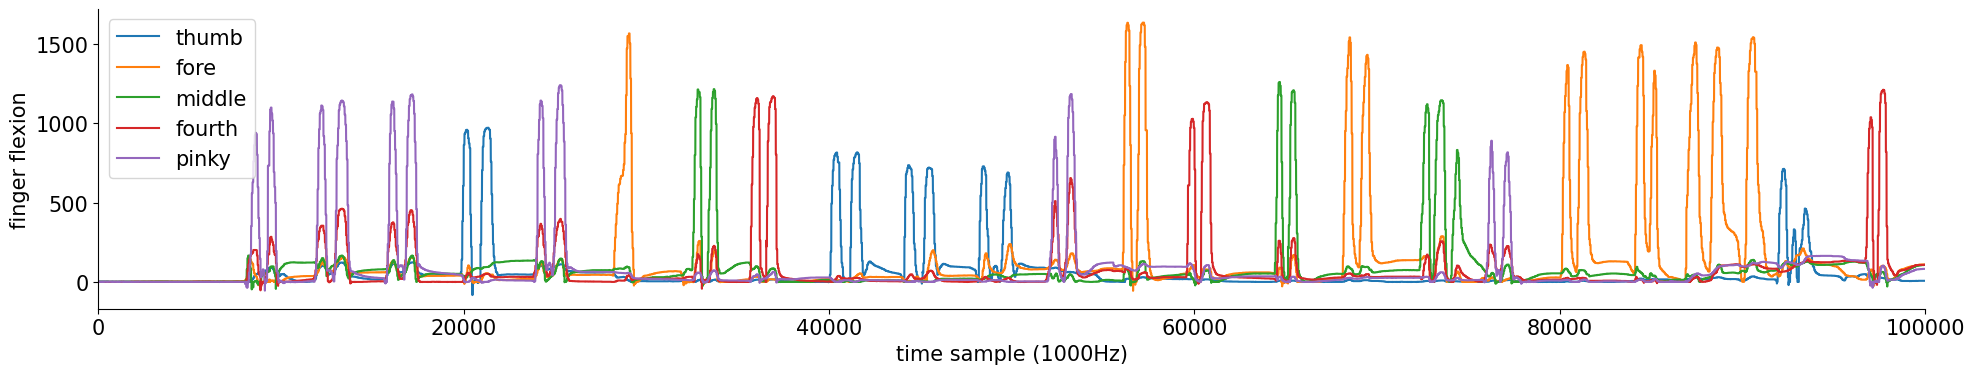

In [33]:
# finger data from the dataglove
dg = dat['dg']
nfingers = dg.shape[1]

for j in range(dg.shape[-1]):
  plt.plot(dg[:100000, j])

plt.xlabel('time sample (1000Hz)')
plt.ylabel('finger flexion')
plt.xlim([0, 100000])
plt.legend(dat['stimtext'])
plt.show()

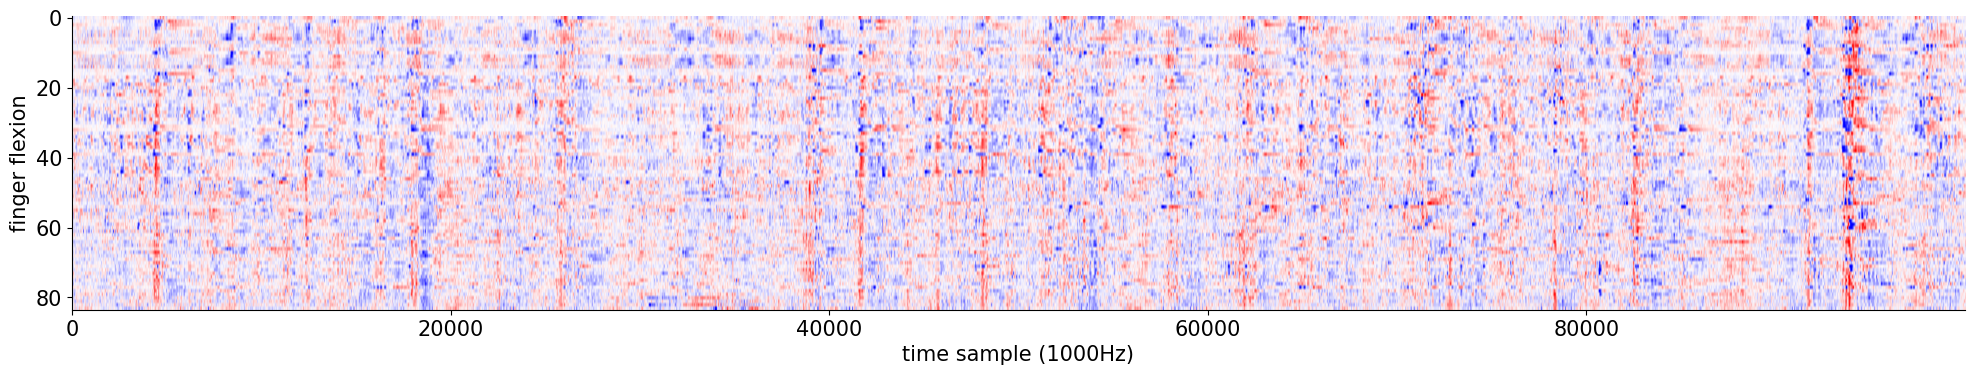

In [34]:
# voltage data in the same time period
V = dat['V'].astype('float32')
plt.imshow(V[:100000, :].T,
           aspect='auto',
           vmax=4,
           vmin=-4,
           cmap='bwr')

plt.xlabel('time sample (1000Hz)')
plt.ylabel('finger flexion')
plt.show()

This is a visualization that seems to provide some really interesting insight and is really rich, but I don't know how to read it. What do the colors mean? How is that correlating to finger flexions? Ultimately, I don't even fully get what they mean by "finger flexions".

In [35]:
# compute correlations between high frequency band and each digit
from scipy import signal

V = dat['V'].astype('float32')
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)
V = np.abs(V)**2
b, a = signal.butter(3, [3], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

nt, nchan = V.shape

cc = np.zeros((nchan,nfingers))
for j in range(nchan):
  for k in range(nfingers):
    cc[j, k] = np.corrcoef(V[:, j], dg[:, k])[0, 1]

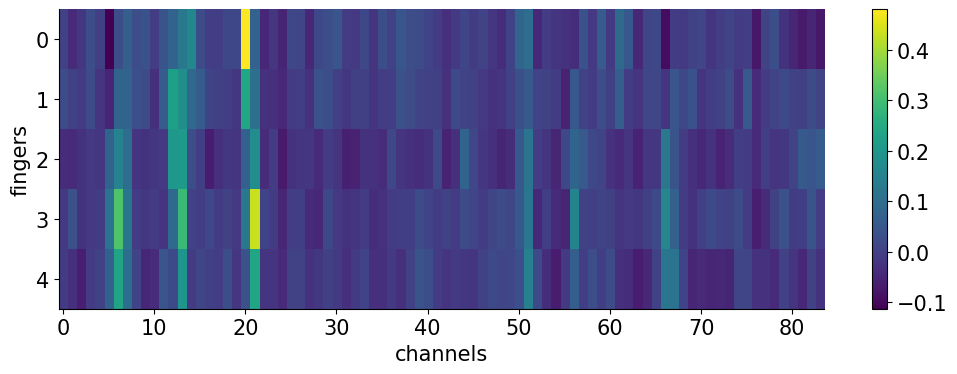

In [36]:
plt.subplot(1, 2, 1)
plt.imshow(cc.T, aspect='auto')
plt.colorbar()
plt.xlabel('channels')
plt.ylabel('fingers')
plt.show()

Electrode 21 also seems correlate with the ring finger, and there's a few other semi correlated channels and fingers that would be cool to explore.

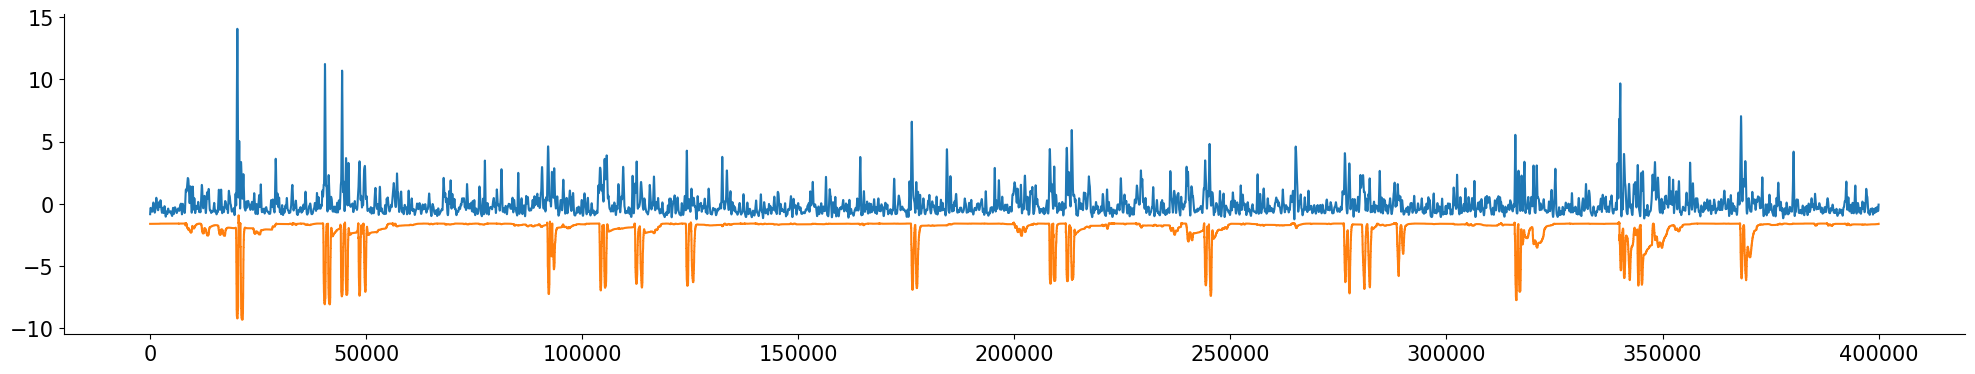

In [37]:
# looks like electrode 20 is well correlated with finger 0 (the thumb). Let's check out the timecourses.
# interestingly, we see that many thumb flexions are indeed correlated with this electrode, but there are other events too
from scipy.stats import zscore

plt.plot(zscore(V[:400000, 20]))
plt.plot(-2 - zscore(dg[:400000, 0]))
plt.show()

These visualizations from the original notebook seem really rich, but I am struggling to interpret them.

I'd really like to do something with this dataset, but in order to really explore it I feel like I need to understand more about the experiment and really take the time to fully flesh out these visualizations. I just don't have the time for it while I'm finishing this assignment up. I really underestimated the time the data exploration would take and how overwhelmed I would be from the data and how difficult it is to really understand what it's telling me. I'm not used to working with data like this, and I'm having a hard time with it.



### Dataset 3 - AJILE12 dataset

The AJILE12 dataset is the largest publicly available human neurobehavioral dataset, recorded opportunistically during passive clinical epilepsy monitoring over a 55 day period. The dataset was created to understand the neural basis of human movement in naturalistic scenarios and expand neuroscience research beyond constrained laboratory paradigms. The data includes thousands of wrist movement events and annotated behavioral states. Neural recordings are available at 500 Hz from at least 64 electrodes per participant, for a total of 1280 hours. Pose trajectories at 9 upper-body keypoints, including wrist, elbow, and shoulder joints, were sampled at 30 frames per second and estimated from 118 million video frames.

This dataset seems really cool, but also complicated.

A couple of interesting questions:
1.) Can we distinguish between voluntary and involuntary movements based on neural activity?
2.) How does neural activity differ between goal-directed movements (e.g., reaching for an object) and spontaneous movements?
3.) Do specific cortical regions preferentially encode different upper-body joints (wrist, elbow, shoulder)?





In [41]:
# @title Install dependencies
!pip install seaborn --quiet
!pip install statsmodels --quiet

In [42]:
# @title Clean install of AJILE12 on Google Colab;
# @markdown This is to prevent overwriting conflicts. You can run this once for each new run instance on colab.
%cd /
%rm -rf /content/Neuromatch-AJILE12/ # removes old version of AJILE12 if it exists
%cd /content # change to content directory where AJILE12 will be installed

/
[Errno 2] No such file or directory: '/content # change to content directory where AJILE12 will be installed'
/


In [40]:
# @title If running on Google Colab, run this cell once, then restart the runtime and run the rest of the notebook
import os
if "COLAB_GPU" in os.environ:
    !git clone https://github.com/neurovium/Neuromatch-AJILE12
    %cd Neuromatch-AJILE12
    %pip install -e . --quiet

Cloning into 'Neuromatch-AJILE12'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 292 (delta 130), reused 225 (delta 71), pack-reused 0 (from 0)
Receiving objects: 100% (292/292), 9.15 MiB | 10.84 MiB/s, done.
Resolving deltas: 100% (130/130), done.
/Neuromatch-AJILE12
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 64.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00
ERROR: Cannot install Neuromatch-AJILE12 and neuromatch-ajile12==1.0.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


I can't get this dataset to load, so I am moving on.

I attempted to find a good dataset investigating narcolepsy and the brain, because as someone with narcolepsy it would be really interesting to look into, but I wasn't able to find anything that I could download right away, just datasets I would need to email to get access to.

If I could, I would spend the semester looking at something to do with narcolepsy. I would especially want to explore the relationship between narcolepsy and memory, as I struggle with my own memory quite a bit. For example: How does narcolepsy affect working memory and reaction time, as seen in cognitive task datasets with EEG/fMRI data?

Anyways, I'm very sorry Lucy. I am overwhelmed and running out of time because I greatly underestimated this portion of the homework assignment. I think I'd like to pose the question listed above in class, but I'm not 100% sure I'd be able to find data associated with it.